In [1]:
#Importing all the libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [14]:
#Initializer
short_MA = 50
long_MA = 200
start_date = '20100101'
end_date = '20201223'

In [12]:
#Data reading & cleaning
equity_df = pd.read_csv("spy.csv", error_bad_lines = False)
date = equity_df["Date"].to_list()
equity_df.drop(equity_df.columns[0], axis=1, inplace=True)
equity_df.set_index("Date", inplace=True)
#equity_df.index.name = None
equity_df

,SPY
Date,
2012-05-31,108.692978
2012-06-01,105.956421
2012-06-04,105.906792
2012-06-05,106.708755
2012-06-06,109.106346
...,...
2022-05-23,396.920013
2022-05-24,393.890015
2022-05-25,397.369995


In [5]:
ema_short = equity_df.ewm(span=short_MA, adjust=False).mean()
sma_short = equity_df.rolling(short_MA).mean()
ema_long = equity_df.ewm(span=long_MA, adjust=False).mean()
sma_long = equity_df.rolling(long_MA).mean()

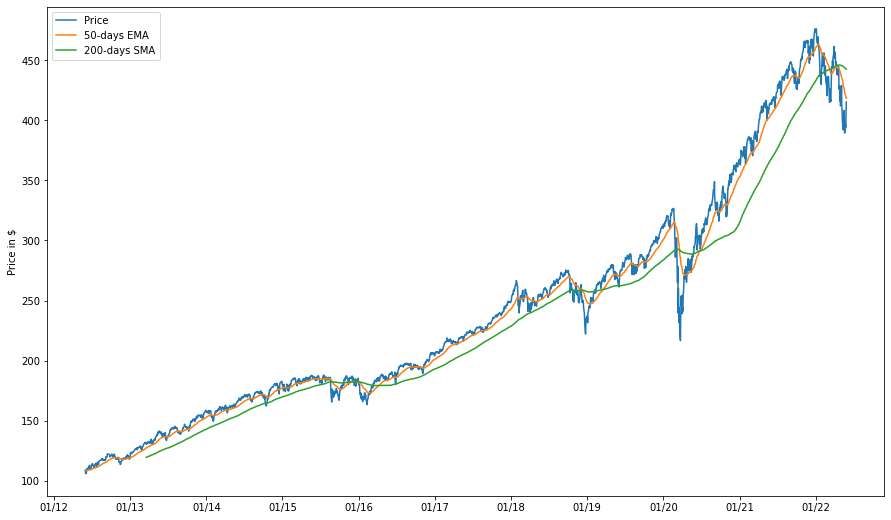

In [24]:

date_index = pd.to_datetime(equity_df.loc[:].index, format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(15,9))


ax.plot(date_index, equity_df.loc[:], label='Price')
ax.plot(date_index, ema_short.loc[:], label = '50-days EMA')
ax.plot(date_index, sma_long.loc[:], label = '200-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)



In [19]:
trading_positions_raw = ema_short - sma_long
trading_positions = trading_positions_raw.apply(np.sign) 
trading_positions_final = trading_positions.shift(1)
trading_positions_raw

,SPY
Date,
2012-05-31,NaN
2012-06-01,NaN
2012-06-04,NaN
2012-06-05,NaN
2012-06-06,NaN
...,...
2022-05-23,-22.329627
2022-05-24,-23.175536
2022-05-25,-23.857867


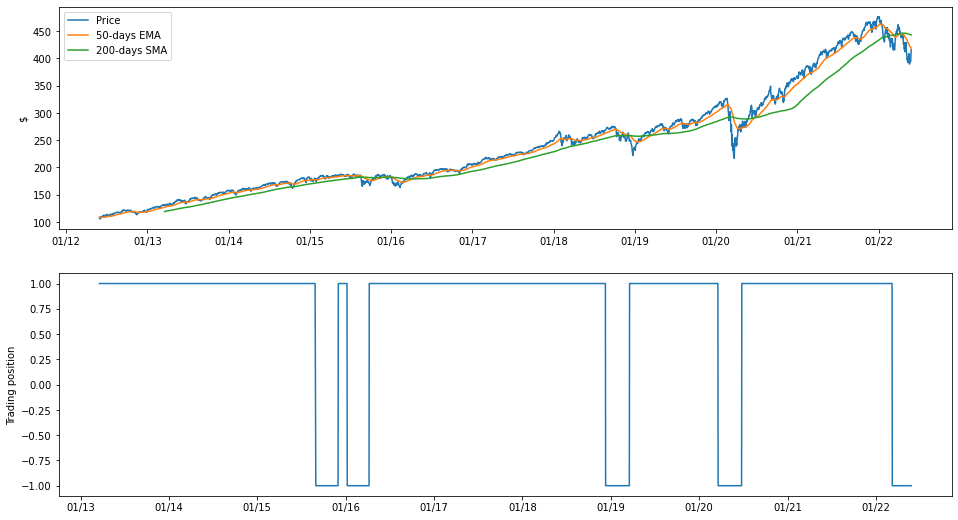

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(date_index, equity_df.loc[:], label='Price')
ax1.plot(date_index, ema_short.loc[:], label = '50-days EMA')
ax1.plot(date_index, sma_long.loc[:], label = '200-days SMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, trading_positions_final, label='Trading position')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [28]:
asset_log_returns = np.log(equity_df).diff()
raw_return = asset_log_returns*trading_positions_final
raw_return

,SPY
Date,
2012-05-31,NaN
2012-06-01,NaN
2012-06-04,NaN
2012-06-05,NaN
2012-06-06,NaN
...,...
2022-05-23,-0.018537
2022-05-24,0.007663
2022-05-25,-0.008796


In [29]:
cum_return = raw_return.cumsum()
rel_cum_return = np.exp(cum_return) - 1

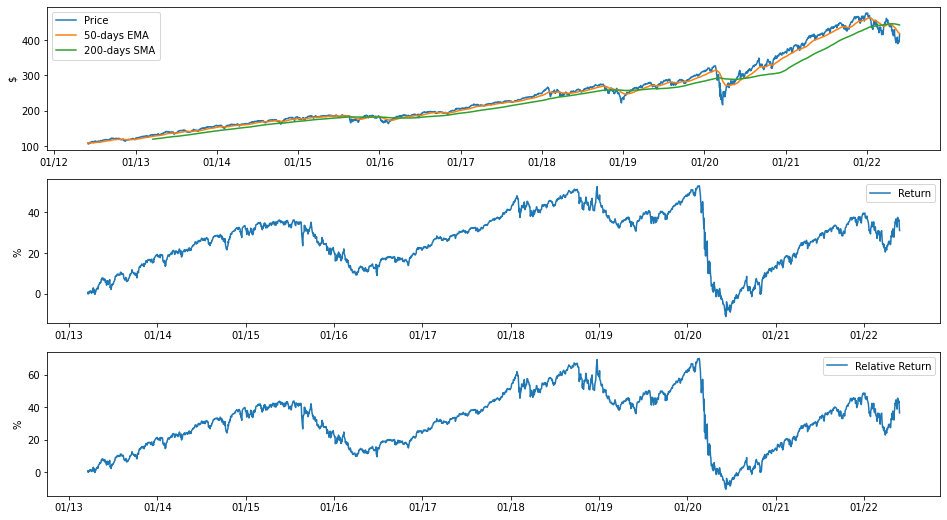

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,9))

ax1.plot(date_index, equity_df.loc[:], label='Price')
ax1.plot(date_index, ema_short.loc[:], label = '50-days EMA')
ax1.plot(date_index, sma_long.loc[:], label = '200-days SMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, 100*cum_return, label="Return")

ax2.set_ylabel('%')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

ax3.plot(date_index, 100*rel_cum_return, label="Relative Return")

ax3.set_ylabel('%')
ax3.legend(loc='best')
ax3.xaxis.set_major_formatter(my_year_month_fmt)

In [4]:
#Data reading & cleaning
crypto_df = pd.read_csv("crypto.csv", error_bad_lines = False)
crypto_df['Date'] = pd.to_datetime(crypto_df["Date"], format='%Y-%m-%d')
date = crypto_df["Date"].to_list()
crypto_df.drop(crypto_df.columns[0], axis=1, inplace=True)
crypto_df.set_index("Date", inplace=True)
#crypto_df.index.name = None
crypto_df

,1INCHBTC,1INCHBUSD,1INCHDOWNUSDT,1INCHUPUSDT,1INCHUSDT,AAVEBKRW,AAVEBNB,AAVEBRL,AAVEBTC,AAVEBUSD,...,ZILBNB,ZILBTC,ZILBUSD,ZILETH,ZILUSDT,ZRXBNB,ZRXBTC,ZRXBUSD,ZRXETH,ZRXUSDT
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,0.000029,0.872,NaN,NaN,0.874,NaN,0.3585,NaN,0.003603,107.0,...,0.000168,0.000002,0.04994,0.000028,0.04998,NaN,0.000013,0.3949,0.000223,0.3941
2022-06-04,0.000029,0.869,NaN,NaN,0.870,NaN,0.3546,NaN,0.003579,106.7,...,0.000167,0.000002,0.05020,0.000028,0.05024,NaN,0.000013,0.3945,0.000218,0.3948
2022-06-05,0.000029,0.858,NaN,NaN,0.859,NaN,0.3476,NaN,0.003465,103.7,...,0.000167,0.000002,0.05002,0.000028,0.05005,NaN,0.000014,0.4067,0.000226,0.4073


In [68]:
#Data reading & cleaning
russell_df = pd.read_csv("russell2000pvdata.csv", error_bad_lines = False)
universesize=2000
vars = ['open', 'high', 'low', 'close', 'volume']
rawdata = {}
for tvar in vars:
    rawdata[tvar] = russell_df.loc[:, ['tickerid', 'ticker', 'date', tvar]]
    rawdata[tvar] = rawdata[tvar].pivot(index = 'date', columns = 'ticker', values = tvar)
    rawdata[tvar] = rawdata[tvar].iloc[:, :universesize]
closing_data = rawdata['close']
closing_data.dropna(axis=1, inplace=True)
closing_data

b'Skipping line 109845: expected 8 fields, saw 11\n'


ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,29.590000,8.586667,57.250000,10.920000,129.00,18.100000,26.760000,5.99,8.75,9.066667,...,58.070000,122.800003,22.309999,17.730000,27.940001,47.759998,4.83,4.49,28.830000,0.55
20101228,29.590000,8.524444,56.500000,10.960000,124.50,17.820000,26.790001,5.95,8.71,9.133333,...,58.279999,95.000000,22.260000,17.750000,27.719999,45.119999,4.71,4.26,28.650000,0.55
20101229,29.790001,8.548148,56.810001,11.070000,123.50,18.450001,26.730000,6.00,8.75,9.203333,...,58.509998,102.000000,22.340000,17.580000,28.469999,44.480000,4.75,4.28,28.209999,0.58
20101230,29.730000,8.548148,56.490002,10.740000,122.50,18.799999,26.600000,5.88,8.77,9.146667,...,59.020000,106.599998,22.100000,17.309999,28.860001,46.400002,4.77,4.31,27.709999,0.62
20101231,29.840000,8.358519,55.830002,10.540000,124.00,18.480000,26.299999,5.96,8.52,8.956667,...,58.419998,102.599998,22.150000,17.290001,28.680000,45.360001,4.66,4.27,26.870001,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,59.939999,64.839996,56.000000,38.590000,1.60,147.649994,40.610001,14.73,9.02,38.990002,...,18.559999,41.439999,19.980000,47.689999,15.200000,20.299999,2.97,7.53,38.410000,14.25
20201218,60.779999,64.320000,55.270000,37.799999,1.54,142.600006,39.930000,14.21,8.95,38.540001,...,16.870001,45.560001,20.440001,47.259998,13.950000,19.990000,2.89,8.41,37.910000,14.00
20201221,60.049999,64.239998,55.389999,36.669998,1.55,141.460007,38.700001,13.79,8.65,38.090000,...,17.379999,45.610001,20.040001,46.020000,13.470000,20.209999,2.80,8.33,36.630001,13.94


In [69]:
ema_short = closing_data.ewm(span=short_MA, adjust=False).mean()
sma_short = closing_data.rolling(short_MA).mean()
ema_long = closing_data.ewm(span=long_MA, adjust=False).mean()
sma_long = closing_data.rolling(long_MA).mean()

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20200930,55.270000,60.250000,60.900002,22.780001,1.02,97.449997,36.660000,11.47,5.80,26.129999,...,7.340000,18.840000,11.490000,42.270000,11.360000,17.930000,2.52,5.84,27.820000,17.450001
20201001,56.160000,60.540001,62.799999,23.030001,1.05,100.300003,36.740002,11.72,5.78,26.850000,...,7.480000,19.340000,11.350000,42.599998,11.630000,17.920000,2.62,5.96,27.770000,18.240000
20201002,55.610001,60.930000,63.889999,23.820000,1.05,103.730003,36.700001,11.85,5.94,27.260000,...,7.650000,19.660000,11.160000,42.680000,11.830000,17.580000,2.63,5.83,28.170000,17.450001
20201005,56.330002,62.049999,65.400002,24.840000,1.09,109.879997,36.830002,11.83,6.17,27.950001,...,7.830000,19.379999,11.570000,42.939999,11.860000,18.059999,2.69,6.05,28.799999,18.570000
20201006,55.709999,62.880001,63.959999,25.379999,1.22,112.559998,36.919998,11.55,6.11,27.620001,...,7.670000,19.260000,11.730000,42.540001,10.890000,17.930000,2.61,6.09,28.510000,18.969999
20201007,56.360001,62.849998,67.019997,25.620001,1.23,113.709999,37.389999,11.73,6.29,29.219999,...,8.470000,20.420000,12.220000,43.209999,12.860000,18.230000,2.73,6.29,30.080000,19.379999
20201008,56.779999,62.770000,67.430000,26.430000,1.38,115.150002,37.480000,11.89,6.44,30.010000,...,8.530000,20.230000,12.450000,43.660000,12.540000,18.450001,2.76,6.34,31.020000,19.100000
20201009,57.990002,63.560001,67.730003,25.879999,1.38,114.699997,37.009998,11.74,6.49,30.080000,...,8.360000,19.770000,12.370000,43.580002,12.280000,18.309999,2.81,6.54,31.290001,19.730000
20201012,58.389999,65.290001,67.360001,26.420000,1.30,113.519997,37.150002,11.87,6.63,30.730000,...,8.360000,20.809999,13.140000,45.330002,12.580000,18.410000,2.80,6.65,31.260000,15.200000


In [74]:
cross = np.where(ema_short > sma_long, 'True', 'False')
ticker = closing_data.columns.values.tolist()
date = list(closing_data.index.values)

In [56]:
cross = pd.DataFrame(cross, columns = ticker, index = date)
cross

,AADR,AAN,AAOI,AAON,AAT,AAWW,ABCB,ABEO,ABG,ABM,...,YMAB,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZNTL,ZUMZ,ZUO,ZYXI
20101227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20101228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20101229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20101230,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20101231,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,True,False,False,True,True,True,True,False,True,True,...,True,True,True,False,False,True,False,True,True,False
20201218,True,False,False,True,True,True,True,False,True,True,...,True,True,True,False,False,True,False,True,True,False
20201221,True,False,False,True,True,True,True,False,True,True,...,True,True,True,False,False,True,False,True,True,False
20201222,True,False,False,True,True,True,True,False,True,True,...,True,True,True,False,False,True,False,True,True,False


In [59]:
sma_long

ticker,AADR,AAN,AAOI,AAON,AAT,AAWW,ABCB,ABEO,ABG,ABM,...,YMAB,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZNTL,ZUMZ,ZUO,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,52.30675,NaN,9.91740,55.95210,26.67265,46.88180,25.72820,2.22435,92.06535,34.61320,...,39.00135,44.56835,11.25270,24.15475,2.82420,6.2049,NaN,26.38695,11.01710,16.67960
20201218,52.36260,NaN,9.91600,55.97885,26.60780,47.04385,25.75570,2.21845,92.34325,34.64335,...,39.13270,44.56075,11.26290,24.13350,2.82240,6.2095,NaN,26.45130,11.02320,16.67875
20201221,52.43185,NaN,9.91930,56.04165,26.56055,47.21665,25.80365,2.21440,92.64950,34.67915,...,39.27625,44.56125,11.27925,24.11860,2.82230,6.2175,NaN,26.51285,11.03725,16.68640


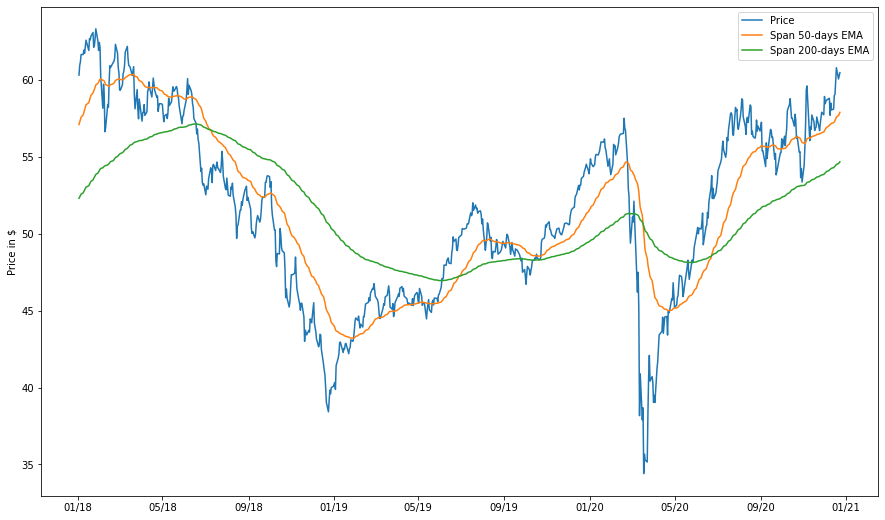

In [70]:
start_date = '20180101'
end_date = '20201223'
date_index = pd.to_datetime(closing_data.loc[start_date:end_date].index, format='%Y%m%d')
fig, ax = plt.subplots(figsize=(15,9))


ax.plot(date_index, closing_data.loc[start_date:end_date,'AADR'], label='Price')
ax.plot(date_index, ema_short.loc[start_date:end_date, 'AADR'], label = 'Span 50-days EMA')
ax.plot(date_index, ema_long.loc[start_date:end_date, 'AADR'], label = 'Span 200-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [75]:
trading_positions_raw = ema_short - sma_long
trading_positions = trading_positions_raw.apply(np.sign) * 1/len(ticker)
trading_positions_final = trading_positions.shift(1)
trading_positions_final

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,0.000847,0.000847,0.000847,0.000847,-0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,...,0.000847,0.000847,0.000847,0.000847,0.000847,-0.000847,-0.000847,0.000847,0.000847,-0.000847
20201218,0.000847,0.000847,0.000847,0.000847,-0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,...,0.000847,0.000847,0.000847,0.000847,0.000847,-0.000847,-0.000847,0.000847,0.000847,-0.000847
20201221,0.000847,0.000847,0.000847,0.000847,-0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,...,0.000847,0.000847,0.000847,0.000847,0.000847,-0.000847,-0.000847,0.000847,0.000847,-0.000847


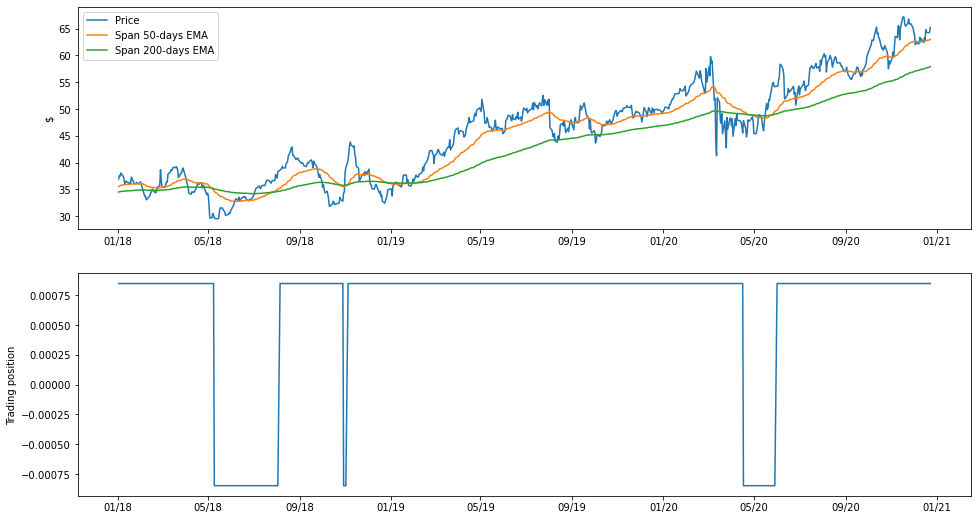

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(date_index, closing_data.loc[start_date:end_date,'AAON'], label='Price')
ax1.plot(date_index, ema_short.loc[start_date:end_date, 'AAON'], label = 'Span 50-days EMA')
ax1.plot(date_index, ema_long.loc[start_date:end_date, 'AAON'], label = 'Span 200-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, trading_positions_final.loc[start_date:end_date, 'AAON'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [77]:
asset_log_returns = np.log(closing_data).diff()
asset_log_returns

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101228,0.000000,-0.007273,-0.013187,0.003656,-0.035507,-0.015591,0.001120,-0.006700,-0.004582,0.007326,...,0.003610,-0.256680,-0.002244,0.001127,-0.007905,-0.056863,-0.025159,-0.052584,-0.006263,0.000000
20101229,0.006736,0.002777,0.005472,0.009986,-0.008065,0.034743,-0.002242,0.008368,0.004582,0.007635,...,0.003939,0.071096,0.003587,-0.009624,0.026697,-0.014286,0.008457,0.004684,-0.015477,0.053110
20101230,-0.002016,0.000000,-0.005649,-0.030264,-0.008130,0.018792,-0.004875,-0.020203,0.002283,-0.006176,...,0.008679,0.044111,-0.010801,-0.015478,0.013606,0.042260,0.004202,0.006985,-0.017883,0.066691
20101231,0.003693,-0.022433,-0.011752,-0.018798,0.012171,-0.017168,-0.011342,0.013514,-0.028920,-0.020991,...,-0.010218,-0.038246,0.002260,-0.001156,-0.006257,-0.022669,-0.023331,-0.009324,-0.030783,-0.032790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,0.014960,0.030694,0.008428,0.001296,-0.018576,0.019629,0.006671,0.021964,0.028108,0.009276,...,0.010290,0.031624,0.018692,0.001679,-0.048790,0.014889,0.073331,0.010681,0.019719,0.027029
20201218,0.013917,-0.008052,-0.013121,-0.020684,-0.038221,-0.034801,-0.016886,-0.035940,-0.007791,-0.011609,...,-0.095472,0.094784,0.022762,-0.009057,-0.085816,-0.015389,-0.027305,0.110526,-0.013103,-0.017700
20201221,-0.012083,-0.001245,0.002169,-0.030350,0.006473,-0.008027,-0.031288,-0.030002,-0.034094,-0.011745,...,0.029783,0.001097,-0.019763,-0.026588,-0.035015,0.010945,-0.031637,-0.009558,-0.034347,-0.004295


In [78]:
raw_return = asset_log_returns*trading_positions_final
raw_return

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,0.000013,0.000026,0.000007,0.000001,0.000016,0.000017,0.000006,0.000019,0.000024,0.000008,...,8.712718e-06,2.677738e-05,0.000016,0.000001,-0.000041,-0.000013,-0.000062,0.000009,0.000017,-0.000023
20201218,0.000012,-0.000007,-0.000011,-0.000018,0.000032,-0.000029,-0.000014,-0.000030,-0.000007,-0.000010,...,-8.083973e-05,8.025706e-05,0.000019,-0.000008,-0.000073,0.000013,0.000023,0.000094,-0.000011,0.000015
20201221,-0.000010,-0.000001,0.000002,-0.000026,-0.000005,-0.000007,-0.000026,-0.000025,-0.000029,-0.000010,...,2.521855e-05,9.287486e-07,-0.000017,-0.000023,-0.000030,-0.000009,0.000027,-0.000008,-0.000029,0.000004


In [85]:
cum_return = raw_return.cumsum()
rel_cum_return = np.exp(cum_return) - 1

total_cum_return = cum_return.sum(axis=1)
total_rel_cum_return = rel_cum_return.sum(axis=1)

date
20101227    0.000000
20101228    0.000000
20101229    0.000000
20101230    0.000000
20101231    0.000000
              ...   
20201217   -0.196763
20201218   -0.203812
20201221   -0.210239
20201222   -0.209138
20201223   -0.198155
Length: 2517, dtype: float64

date
20101227         NaN
20101228         NaN
20101229         NaN
20101230         NaN
20101231         NaN
              ...   
20200417   -0.000029
20200420    0.000019
20200421    0.000030
20200422   -0.000025
20200423    0.000007
Name: XPER, Length: 2347, dtype: float64


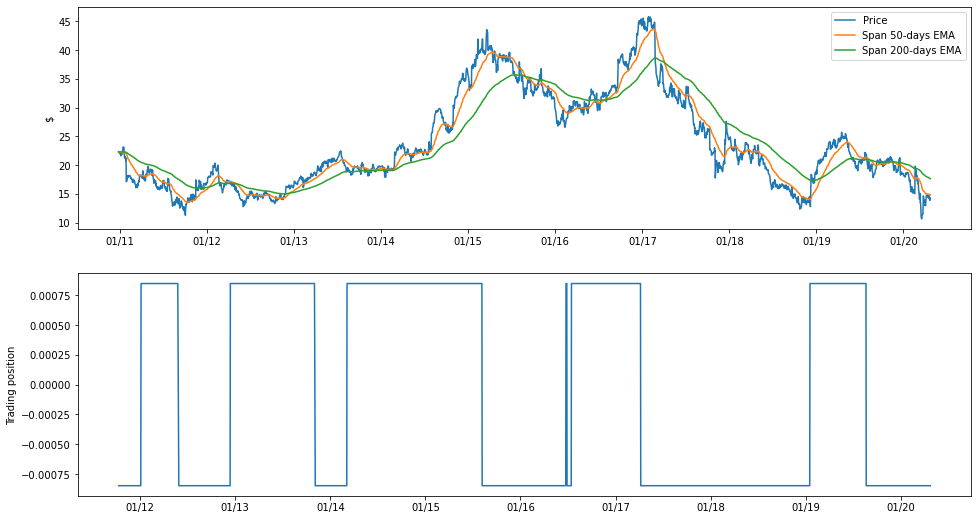

In [80]:
start_date = '20100101'
end_date = '20200423'
ticker_choice = "XPER"
date_index = pd.to_datetime(closing_data.loc[start_date:end_date].index, format='%Y%m%d')
cum_return = raw_return.loc[start_date:end_date,ticker_choice].cumsum()
print(raw_return.loc[start_date:end_date,ticker_choice])


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(date_index, closing_data.loc[start_date:end_date,ticker_choice], label='Price')
ax1.plot(date_index, ema_short.loc[start_date:end_date, ticker_choice], label = 'Span 50-days EMA')
ax1.plot(date_index, ema_long.loc[start_date:end_date, ticker_choice], label = 'Span 200-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, trading_positions_final.loc[start_date:end_date, ticker_choice], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [81]:
start_date = '20100101'
end_date = '20201223'

KeyError: 'total'

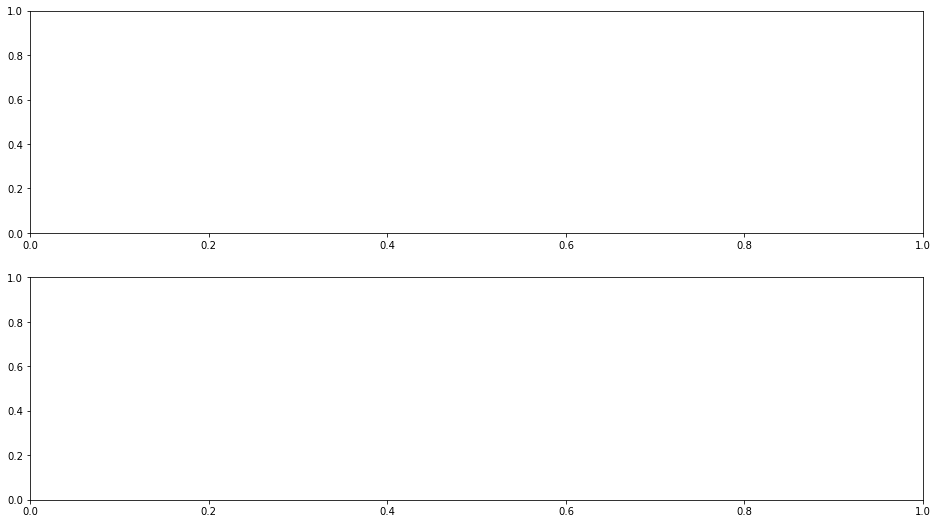

In [82]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

date_index = pd.to_datetime(raw_return.loc[start_date:end_date, 'total'].index, format='%Y%m%d')
ax1.plot(date_index, raw_return.loc[start_date:end_date,'total'].cumsum(), label='Profit')


ax1.set_ylabel('%')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ValueError: x and y must have same first dimension, but have shapes (2347,) and (2517,)

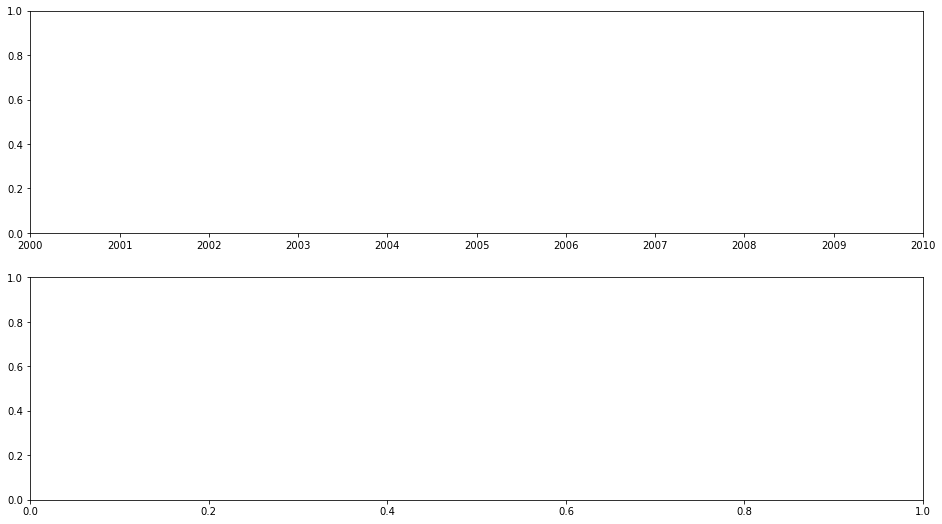

In [81]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

date_index = pd.to_datetime(raw_return.loc[start_date:end_date].index, format='%Y%m%d')
ax1.plot(date_index, total_cum_return, label="return")

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)


ax2.plot(date_index, 100*total_rel_cum_return, label="return")

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)